In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 100)

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

In [ ]:
df = pd.read_csv('Allrecipes.csv')
print(f"Shape: {df.shape}")

Shape: (38237, 6)


In [ ]:
df.head()

,title,total_time,ingredients,instructions,servings,nutrients
0,Instant Pistachio Salad,35.0,"['1 (20 ounce) can crushed pineapple, drained', '1 (3 ounce) package instant pistachio pudding m...",Combine pineapple and dry pistachio pudding mix in a large bowl. Fold in thawed whipped topping ...,12 servings,"{'calories': '159 kcal', 'carbohydrateContent': '29 g', 'fiberContent': '0 g', 'proteinContent':..."
1,Easy Chicken Tetrazzini,0.0,"['1 pound cooked and drained spaghetti', '5 chicken breasts, cooked and cubed', '2 (10.75 ounce)...",Put cooked spaghetti into 9x13-inch baking dish. Place chicken on top of spaghetti.\nIn medium s...,8 servings,"{'calories': '473 kcal', 'carbohydrateContent': '48 g', 'cholesterolContent': '77 mg', 'fiberCon..."
2,Green Pea Salad With Cheddar Cheese,10.0,"['3 (14.5 ounce) cans sweet peas, drained', '3 hard-cooked eggs, chopped', '0.75 cup Cheddar che...","Mix sweet peas, hard-cooked eggs, Cheddar cheese cubes, mayonnaise, and onion together in a bowl...",6 servings,"{'calories': '386 kcal', 'carbohydrateContent': '21 g', 'cholesterolContent': '133 mg', 'fiberCo..."
3,Chilled Strawberry Soup,480.0,"['2 cups frozen strawberries', '2 cups milk', '1 cup heavy cream', '0.5 cup sour cream', '2 tabl...","Puree strawberries, milk, cream and sour cream in a blender or food processor until smooth. Stir...",6 servings,"{'calories': '252 kcal', 'carbohydrateContent': '14 g', 'cholesterolContent': '69 mg', 'fiberCon..."
4,Fried Mac and Cheese Balls,430.0,"['1 (7.25 ounce) package macaroni and cheese mix', '2 tablespoons butter', '0.25 cup milk', '1 c...",Fill a pot with lightly salted water and bring to a rolling boil over high heat. Stir in macaron...,8 servings,"{'calories': '543 kcal', 'carbohydrateContent': '42 g', 'cholesterolContent': '147 mg', 'fiberCo..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38237 entries, 0 to 38236
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         38237 non-null  object 
 1   total_time    38235 non-null  float64
 2   ingredients   38237 non-null  object 
 3   instructions  38237 non-null  object 
 4   servings      38228 non-null  object 
 5   nutrients     38226 non-null  object 
dtypes: float64(1), object(5)
memory usage: 1.8+ MB


In [ ]:
print(df.dtypes)

title            object
total_time      float64
ingredients      object
instructions     object
servings         object
nutrients        object
dtype: object


In [ ]:
df.describe()

,total_time
count,38235.000000
mean,160.098836
std,1346.116633
min,0.000000
25%,30.000000
50%,50.000000
75%,95.000000
max,172820.000000


In [ ]:
print("Missing Values Count:")
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Percentage': missing_percentage
})
print(missing_df[missing_df['Missing Count'] > 0])

Missing Values Count:
            Missing Count  Percentage
total_time              2    0.005231
servings                9    0.023537
nutrients              11    0.028768


In [ ]:
print(f"Number of duplicate rows: {df.duplicated().sum()}")
print(f"Number of duplicate titles: {df['title'].duplicated().sum()}")

Number of duplicate rows: 0
Number of duplicate titles: 27


In [ ]:
df_clean = df.drop_duplicates(subset=['title'], keep='first')
print(f"Shape after removing duplicates: {df_clean.shape}")
print(f"Removed {len(df) - len(df_clean)} duplicate recipes")

Shape after removing duplicates: (38210, 6)
Removed 27 duplicate recipes


### Ingredients Analysis

In [ ]:
def safe_parse_list(x):
    """Safely parse string representation of list"""
    if pd.isna(x):
        return []
    try:
        return ast.literal_eval(x)
    except:
        return []

df_clean['ingredients_list'] = df_clean['ingredients'].apply(safe_parse_list)
df_clean['num_ingredients'] = df_clean['ingredients_list'].apply(len)

print("Ingredients Statistics:")
print(df_clean['num_ingredients'].describe())

Ingredients Statistics:
count    38210.000000
mean         9.603481
std          4.118858
min          0.000000
25%          7.000000
50%          9.000000
75%         12.000000
max         39.000000
Name: num_ingredients, dtype: float64


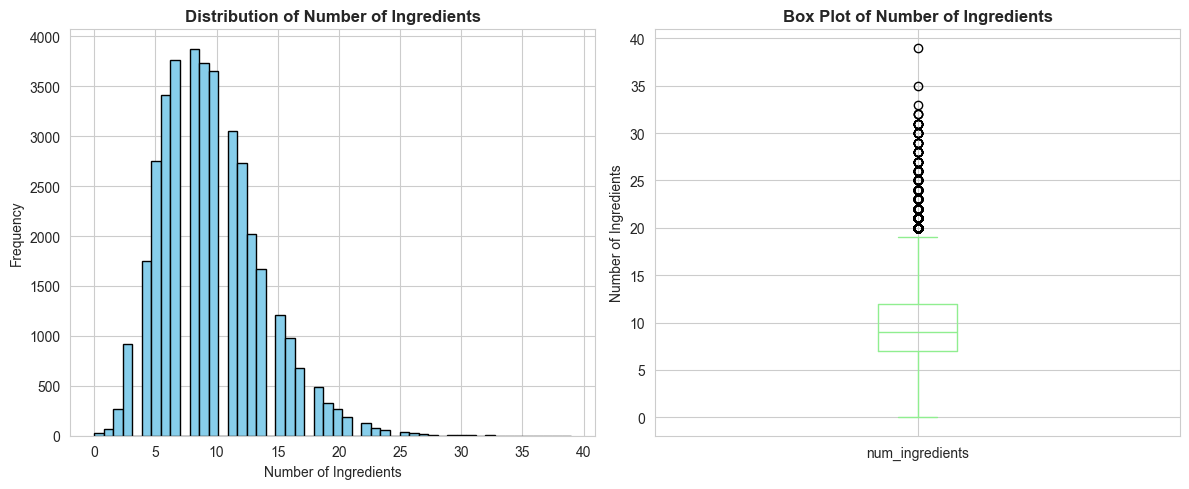

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
df_clean['num_ingredients'].hist(bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Number of Ingredients', fontweight='bold')
plt.xlabel('Number of Ingredients')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
df_clean['num_ingredients'].plot(kind='box', color='lightgreen')
plt.title('Box Plot of Number of Ingredients', fontweight='bold')
plt.ylabel('Number of Ingredients')

plt.tight_layout()
plt.show()

In [14]:
print("\ Ingredients from first recipe:")
if len(df_clean['ingredients_list'].iloc[0]) > 0:
    for i, ingredient in enumerate(df_clean['ingredients_list'].iloc[0][:5], 1):
        print(f"{i}. {ingredient}")

\ Ingredients from first recipe:
1. 1 (20 ounce) can crushed pineapple, drained
2. 1 (3 ounce) package instant pistachio pudding mix
3. 1 (8 ounce) container frozen whipped topping, thawed
4. 0.5 (10.5 ounce) package miniature marshmallows


### Instructions Analysis

In [ ]:
df_clean['instructions_length'] = df_clean['instructions'].fillna('').apply(len)
df_clean['instructions_word_count'] = df_clean['instructions'].fillna('').apply(lambda x: len(str(x).split()))

print("Instructions Statistics:")
print(f"Average character length: {df_clean['instructions_length'].mean():.2f}")
print(f"Average word count: {df_clean['instructions_word_count'].mean():.2f}")
print(f"\nDetailed statistics:")
print(df_clean['instructions_word_count'].describe())

Instructions Statistics:
Average character length: 641.30
Average word count: 112.50

Detailed statistics:
count    38210.000000
mean       112.497016
std         66.141697
min          2.000000
25%         68.000000
50%        100.000000
75%        142.000000
max       1039.000000
Name: instructions_word_count, dtype: float64


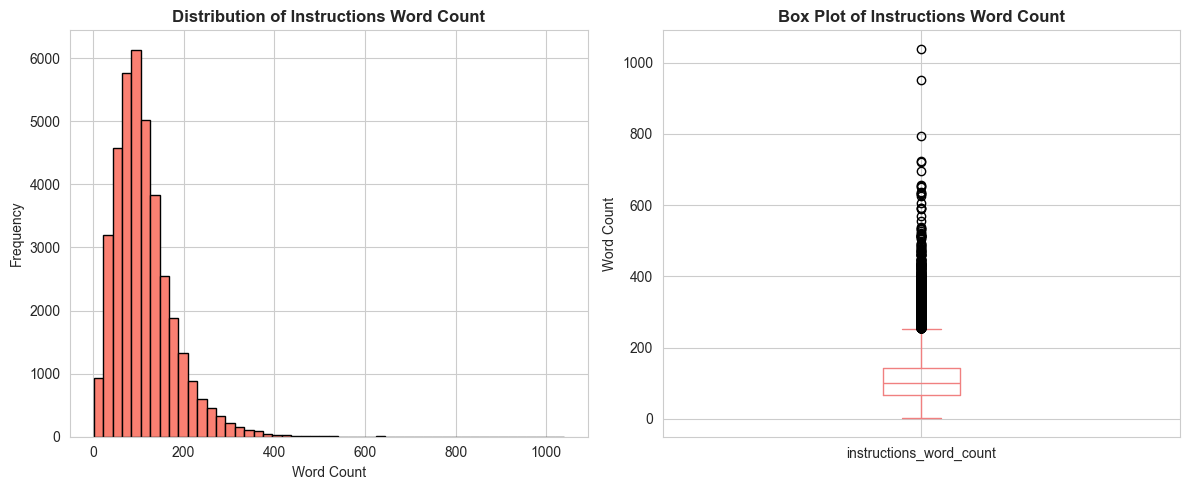

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
df_clean['instructions_word_count'].hist(bins=50, color='salmon', edgecolor='black')
plt.title('Distribution of Instructions Word Count', fontweight='bold')
plt.xlabel('Word Count')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
df_clean['instructions_word_count'].plot(kind='box', color='lightcoral')
plt.title('Box Plot of Instructions Word Count', fontweight='bold')
plt.ylabel('Word Count')

plt.tight_layout()
plt.show()

### Total Time Analysis

In [ ]:
print("Total Time Statistics:")
print(df_clean['total_time'].describe())
print(f"\nNull values: {df_clean['total_time'].isnull().sum()}")
print(f"Zero values: {(df_clean['total_time'] == 0).sum()}")

Total Time Statistics:
count     38208.000000
mean        160.064306
std        1346.510727
min           0.000000
25%          30.000000
50%          50.000000
75%          95.000000
max      172820.000000
Name: total_time, dtype: float64

Null values: 2
Zero values: 1578


### Servings Analysis

In [ ]:
def extract_servings_number(x):
    """Extract numeric value from servings string"""
    if pd.isna(x):
        return np.nan
    try:
        import re
        match = re.search(r'\d+', str(x))
        if match:
            return int(match.group())
        return np.nan
    except:
        return np.nan

df_clean['servings_num'] = df_clean['servings'].apply(extract_servings_number)

print("Servings Statistics:")
print(df_clean['servings_num'].describe())

Servings Statistics:
count    38201.000000
mean        10.886888
std         13.176471
min          1.000000
25%          4.000000
50%          8.000000
75%         12.000000
max        472.000000
Name: servings_num, dtype: float64


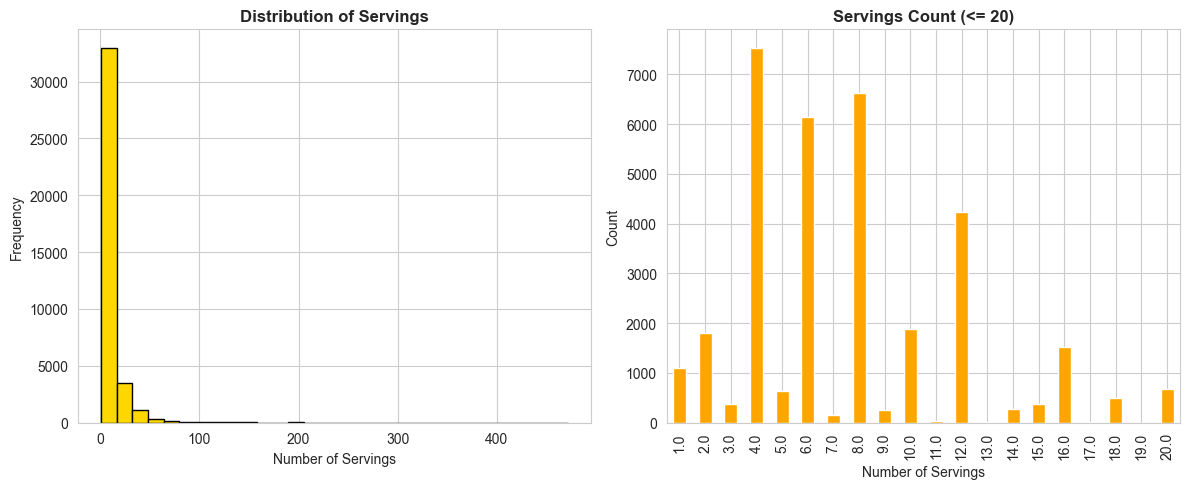

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
df_clean['servings_num'].hist(bins=30, color='gold', edgecolor='black')
plt.title('Distribution of Servings', fontweight='bold')
plt.xlabel('Number of Servings')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
df_clean[df_clean['servings_num'] <= 20]['servings_num'].value_counts().sort_index().plot(kind='bar', color='orange')
plt.title('Servings Count (<= 20)', fontweight='bold')
plt.xlabel('Number of Servings')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

### Nutrients Analysis

In [ ]:
def safe_parse_dict(x):
    """Safely parse string representation of dictionary"""
    if pd.isna(x):
        return {}
    try:
        return ast.literal_eval(x)
    except:
        return {}

df_clean['nutrients_dict'] = df_clean['nutrients'].apply(safe_parse_dict)

def extract_nutrient_value(nutrient_dict, key):
    """Extract numeric value from nutrient string"""
    if not nutrient_dict or key not in nutrient_dict:
        return np.nan
    try:
        import re
        value_str = nutrient_dict[key]
        match = re.search(r'[\d.]+', str(value_str))
        if match:
            return float(match.group())
        return np.nan
    except:
        return np.nan

df_clean['calories'] = df_clean['nutrients_dict'].apply(lambda x: extract_nutrient_value(x, 'calories'))
df_clean['protein'] = df_clean['nutrients_dict'].apply(lambda x: extract_nutrient_value(x, 'proteinContent'))
df_clean['fat'] = df_clean['nutrients_dict'].apply(lambda x: extract_nutrient_value(x, 'fatContent'))
df_clean['carbs'] = df_clean['nutrients_dict'].apply(lambda x: extract_nutrient_value(x, 'carbohydrateContent'))
df_clean['fiber'] = df_clean['nutrients_dict'].apply(lambda x: extract_nutrient_value(x, 'fiberContent'))
df_clean['sugar'] = df_clean['nutrients_dict'].apply(lambda x: extract_nutrient_value(x, 'sugarContent'))

print("Nutrients Statistics:")
print(df_clean[['calories', 'protein', 'fat', 'carbs', 'fiber', 'sugar']].describe())

Nutrients Statistics:
           calories       protein           fat         carbs         fiber  \
count  37651.000000  37400.000000  37070.000000  37601.000000  36270.000000   
mean     323.652785     13.489679     16.684354     31.369591      2.919713   
std      216.522108     14.595678     15.059641     24.708616      3.139044   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%      172.000000      3.000000      7.000000     13.000000      1.000000   
50%      288.000000      8.000000     13.000000     27.000000      2.000000   
75%      429.000000     21.000000     23.000000     44.000000      4.000000   
max     5701.000000    519.000000    433.000000    622.000000     71.000000   

              sugar  
count  35935.000000  
mean      12.673299  
std       15.675017  
min        0.000000  
25%        3.000000  
50%        7.000000  
75%       18.000000  
max      575.000000  


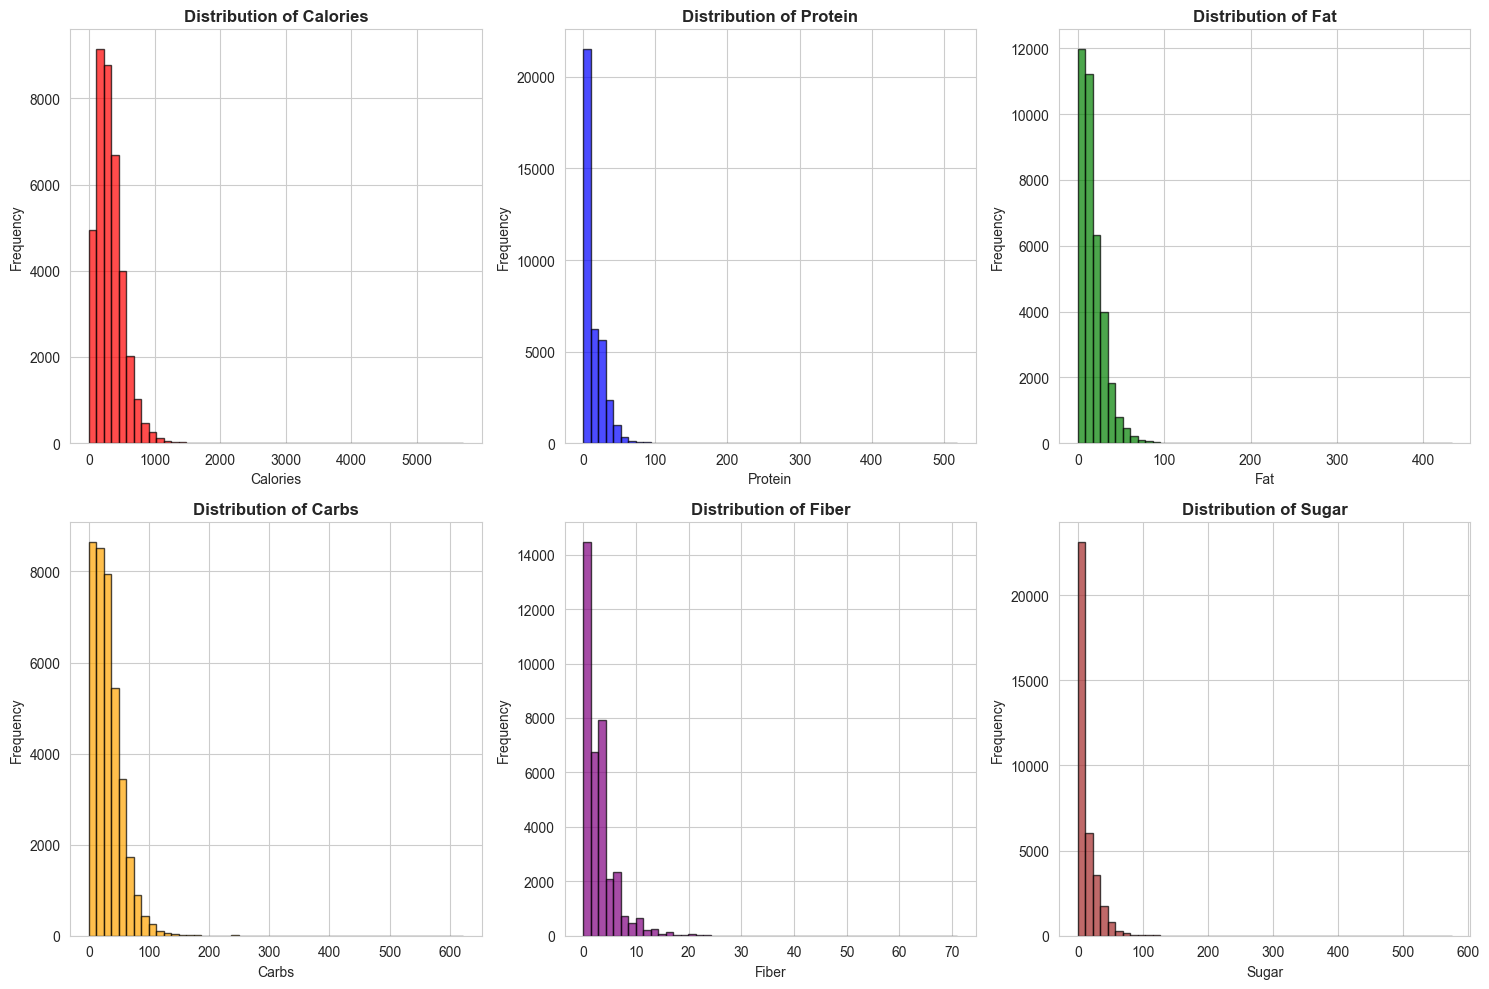

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

nutrients = ['calories', 'protein', 'fat', 'carbs', 'fiber', 'sugar']
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown']

for idx, (nutrient, color) in enumerate(zip(nutrients, colors)):
    row = idx // 3
    col = idx % 3
    
    df_clean[nutrient].dropna().hist(bins=50, ax=axes[row, col], color=color, alpha=0.7, edgecolor='black')
    axes[row, col].set_title(f'Distribution of {nutrient.capitalize()}', fontweight='bold')
    axes[row, col].set_xlabel(nutrient.capitalize())
    axes[row, col].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

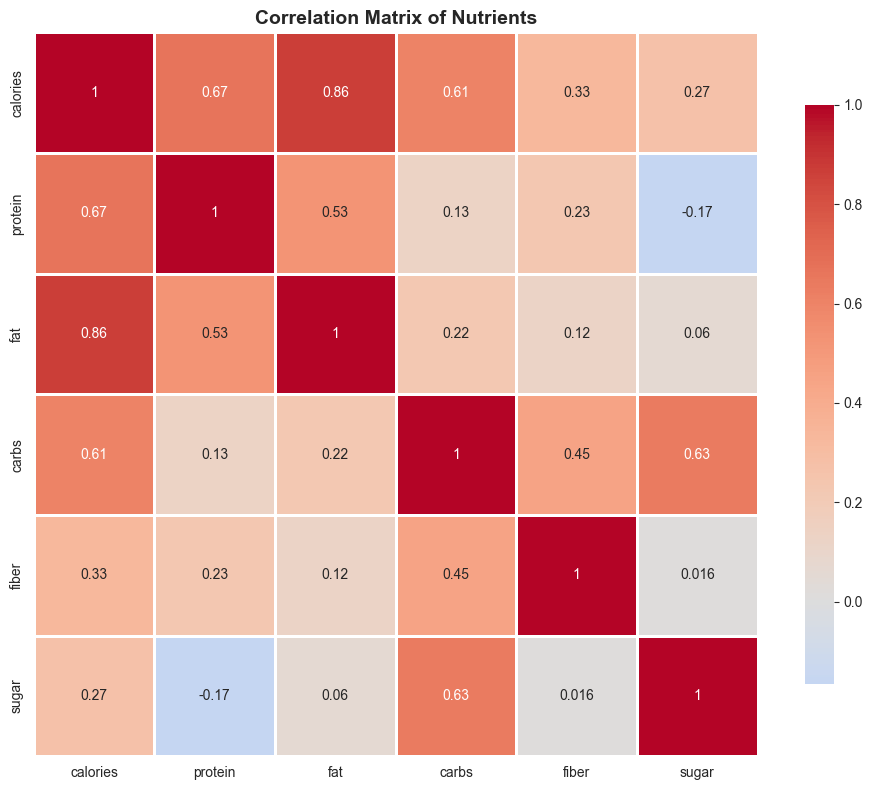

In [ ]:
nutrient_cols = ['calories', 'protein', 'fat', 'carbs', 'fiber', 'sugar']
correlation_matrix = df_clean[nutrient_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Nutrients', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [ ]:
no_ingredients = df_clean[df_clean['num_ingredients'] == 0]
print(f"Recipes with no ingredients: {len(no_ingredients)}")

long_time = df_clean[df_clean['total_time'] > 1440]
print(f"Recipes with cooking time > 24 hours: {len(long_time)}")

high_cal = df_clean[df_clean['calories'] > 2000]
print(f"Recipes with calories > 2000: {len(high_cal)}")

no_instructions = df_clean[df_clean['instructions'].isna() | (df_clean['instructions'] == '')]
print(f"Recipes with no instructions: {len(no_instructions)}")

Recipes with no ingredients: 31
Recipes with cooking time > 24 hours: 461
Recipes with calories > 2000: 30
Recipes with no instructions: 0


In [24]:
# Remove recipes with critical missing data
df_final = df_clean[
    (df_clean['num_ingredients'] > 0) &
    (df_clean['instructions'].notna()) &
    (df_clean['instructions'] != '')
].copy()

print(f"Original dataset size: {len(df)}")
print(f"After removing duplicates: {len(df_clean)}")
print(f"Final cleaned dataset size: {len(df_final)}")
print(f"Total rows removed: {len(df) - len(df_final)}")

Original dataset size: 38237
After removing duplicates: 38210
Final cleaned dataset size: 38179
Total rows removed: 58


In [ ]:
columns_to_save = [
    'title', 'total_time', 'ingredients', 'instructions', 'servings',
    'nutrients', 'num_ingredients', 'servings_num', 'calories', 
    'protein', 'fat', 'carbs', 'fiber', 'sugar',
    'instructions_length', 'instructions_word_count'
]

df_to_save = df_final[columns_to_save]

df_to_save.to_csv('Allrecipes_cleaned.csv', index=False)
print("Cleaned dataset saved as 'Allrecipes_cleaned.csv'")

Cleaned dataset saved as 'Allrecipes_cleaned.csv'
